The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.17.1


# Operações de Geometria e Álgebra Linear
:label:`sec_geometry-linear-algebraic-ops`

Em :numref:`sec_linear-algebra`, encontramos os fundamentos da álgebra linear e vimos como ela poderia ser usada para expressar operações comuns para transformar nossos dados.
A álgebra linear é um dos principais pilares matemáticos subjacentes a grande parte do trabalho que fazemos no *deep learning* e no *machine learning* de forma mais ampla.
Embora :numref:`sec_linear-algebra` contenha maquinário suficiente para comunicar a mecânica dos modelos modernos de aprendizado profundo, há muito mais sobre o assunto.
Nesta seção, iremos mais fundo, destacando algumas interpretações geométricas de operações de álgebra linear e introduzindo alguns conceitos fundamentais, incluindo de autovalores e autovetores.

## Geometria Vetorial
Primeiro, precisamos discutir as duas interpretações geométricas comuns de vetores,
como pontos ou direções no espaço.
Fundamentalmente, um vetor é uma lista de números, como a lista Python abaixo.


In [1]:
v = [1, 7, 0, 1]

Os matemáticos geralmente escrevem isso como um vetor *coluna* ou *linha*, ou seja, como

$$
\mathbf{x} = \begin{bmatrix}1\\7\\0\\1\end{bmatrix},
$$

ou

$$
\mathbf{x}^\top = \begin{bmatrix}1 & 7 & 0 & 1\end{bmatrix}.
$$


Muitas vezes têm interpretações diferentes,
onde os exemplos de dados são vetores de coluna
e os pesos usados para formar somas ponderadas são vetores de linha.
No entanto, pode ser benéfico ser flexível.
Como descrevemos em :numref:`sec_linear-algebra`,
embora a orientação padrão de um único vetor seja um vetor coluna,
para qualquer matriz que representa um conjunto de dados tabular,
tratando cada exemplo de dados como um vetor de linha
na matriz
é mais convencional.

Dado um vetor, a primeira interpretação
que devemos dar é como um ponto no espaço.
Em duas ou três dimensões, podemos visualizar esses pontos
usando os componentes dos vetores para definir
a localização dos pontos no espaço comparada
a uma referência fixa chamada *origem*. Isso pode ser visto em :numref:`fig_grid`.

![Uma ilustração da visualização de vetores como pontos no plano. O primeiro componente do vetor fornece a coordenada $x$, o segundo componente fornece a coordenada $y$. As dimensões superiores são análogas, embora muito mais difíceis de visualizar.](../img/grid-points.svg)
:label:`fig_grid`


Esse ponto de vista geométrico nos permite considerar o problema em um nível mais abstrato.
Não mais confrontado com algum problema aparentemente intransponível
como classificar fotos como gatos ou cachorros,
podemos começar a considerar as tarefas abstratamente
como coleções de pontos no espaço e retratando a tarefa
como descobrir como separar dois grupos distintos de pontos.

Paralelamente, existe um segundo ponto de vista
que as pessoas costumam tomar de vetores: como direções no espaço.
Não podemos apenas pensar no vetor $\mathbf{v} = [3,2]^\top$
como a localização $3$ unidades à direita e $2$ unidades acima da origem,
também podemos pensar nisso como a própria direção
para mover $3$ passos para a direita e $2$ para cima.
Desta forma, consideramos todos os vetores da figura :numref:`fig_arrow` iguais.

![Qualquer vetor pode ser visualizado como uma seta no plano. Nesse caso, todo vetor desenhado é uma representação do vetor $(3,2)^\top$.](../img/par-vec.svg)
:label:`fig_arrow`

Um dos benefícios dessa mudança é que
podemos dar sentido visual ao ato de adição de vetores.
Em particular, seguimos as instruções dadas por um vetor,
e então siga as instruções dadas pelo outro, como pode ser visto em :numref:`fig_add-vec`.

![Podemos visualizar a adição de vetores seguindo primeiro um vetor e depois outro.](../img/vec-add.svg)
:label:`fig_add-vec`

A subtração de vetores tem uma interpretação semelhante.
Considerando a identidade que $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$,
vemos que o vetor $\mathbf{u}-\mathbf{v}$ é a direção
que nos leva do ponto $\mathbf{v}$ ao ponto $\mathbf{u}$.


## Produto Escalar e Ângulos
Como vimos em :numref:`sec_linear-algebra`,
se tomarmos dois vetores de coluna $\mathbf{u}$ and $\mathbf{v}$,
podemos formar seu produto escalar computando:

$$\mathbf{u}^\top\mathbf{v} = \sum_i u_i\cdot v_i.$$
:eqlabel:`eq_dot_def`

Porque :eqref:`eq_dot_def` é simétrico, iremos espelhar a notação
de multiplicação clássica e escrita

$$
\mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u},
$$

para destacar o fato de que a troca da ordem dos vetores produzirá a mesma resposta.

The dot product :eqref:`eq_dot_def` also admits a geometric interpretation: it is closely related to the angle between two vectors.  Consider the angle shown in :numref:`fig_angle`.

![Entre quaisquer dois vetores no plano, existe um ângulo bem definido $\theta$. Veremos que esse ângulo está intimamente ligado ao produto escalar.](../img/vec-angle.svg)
:label:`fig_angle`

Para começar, vamos considerar dois vetores específicos:

$$
\mathbf{v} = (r,0) \; \text{and} \; \mathbf{w} = (s\cos(\theta), s \sin(\theta)).
$$

O vetor $\mathbf{v}$ tem comprimento $r$ e corre paralelo ao eixo $x$,
e o vetor $\mathbf{w}$ tem comprimento $s$ e está no ângulo $\theta$ com o eixo $x$.
Se calcularmos o produto escalar desses dois vetores, vemos que

$$
\mathbf{v}\cdot\mathbf{w} = rs\cos(\theta) = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta).
$$

Com alguma manipulação algébrica simples, podemos reorganizar os termos para obter

$$
\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).
$$

Em suma, para esses dois vetores específicos,
o produto escalar combinado com as normas nos informa o ângulo entre os dois vetores. Este mesmo fato é verdade em geral. Não iremos derivar a expressão aqui, no entanto,
se considerarmos escrever $\|\mathbf{v} - \mathbf{w}\|^2$ de duas maneiras:
um com o produto escalar e o outro geometricamente usando a lei dos cossenos,
podemos obter o relacionamento completo.
Na verdade, para quaisquer dois vetores $\mathbf{v}$ e $\mathbf{w}$,
o ângulo entre os dois vetores é

$$\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).$$
:eqlabel:`eq_angle_forumla`


Este é um bom resultado, pois nada no cálculo faz referência a duas dimensões.
Na verdade, podemos usar isso em três ou três milhões de dimensões sem problemas.

Como um exemplo simples, vamos ver como calcular o ângulo entre um par de vetores:


In [2]:
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l


def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

Não o usaremos agora, mas é útil saber
que iremos nos referir a vetores para os quais o ângulo é $\pi/2$
(ou equivalentemente $90^{\circ}$) como sendo *ortogonal*.
Examinando a equação acima, vemos que isso acontece quando $\theta = \pi/2$,
que é a mesma coisa que $\cos(\theta) = 0$.
A única maneira de isso acontecer é se o produto escalar em si for zero,
e dois vetores são ortogonais se e somente se $\mathbf{v}\cdot\mathbf{w} = 0$.
Esta será uma fórmula útil para compreender objetos geometricamente.

É razoável perguntar: por que calcular o ângulo é útil?
A resposta vem no tipo de invariância que esperamos que os dados tenham.
Considere uma imagem e uma imagem duplicada,
onde cada valor de pixel é o mesmo, mas com $10\%$ do brilho.
Os valores dos pixels individuais estão geralmente longe dos valores originais.
Assim, se computarmos a distância entre a imagem original e a mais escura,
a distância pode ser grande.
No entanto, para a maioria dos aplicativos de ML, o *conteúdo* é o mesmo --- ainda é
uma imagem de um gato no que diz respeito a um classificador gato / cão.
No entanto, se considerarmos o ângulo, não é difícil ver
que para qualquer vetor $\mathbf{v}$, o ângulo
entre $\mathbf{v}$ e $0.1\cdot\mathbf{v}$ é zero.
Isso corresponde ao fato de que os vetores de escala
mantém a mesma direção e apenas altera o comprimento.
O ângulo considera a imagem mais escura idêntica.

Exemplos como este estão por toda parte.
No texto, podemos querer que o tópico seja discutido
para não mudar se escrevermos o dobro do tamanho do documento que diz a mesma coisa.
Para algumas codificações (como contar o número de ocorrências de palavras em algum vocabulário), isso corresponde a uma duplicação do vetor que codifica o documento,
então, novamente, podemos usar o ângulo.

### Semelhança de Cosseno
Em contextos de ML onde o ângulo é empregado
para medir a proximidade de dois vetores,
os profissionais adotam o termo *semelhança de cosseno*
para se referir à porção
$$
\cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

O cosseno assume um valor máximo de $1$
quando os dois vetores apontam na mesma direção,
um valor mínimo de $-1$ quando apontam em direções opostas,
e um valor de $0$ quando os dois vetores são ortogonais.
Observe que se os componentes de vetores de alta dimensão
são amostrados aleatoriamente com $0$ médio,
seu cosseno será quase sempre próximo a $0$.


## Hiperplanos


Além de trabalhar com vetores, outro objeto-chave
que você deve entender para ir longe na álgebra linear
é o *hiperplano*, uma generalização para dimensões superiores
de uma linha (duas dimensões) ou de um plano (três dimensões).
Em um espaço vetorial $d$-dimensional, um hiperplano tem $d-1$ dimensões
e divide o espaço em dois meios-espaços.

Vamos começar com um exemplo.
Suponha que temos um vetor coluna $\mathbf{w}=[2,1]^\top$.  Queremos saber, "quais são os pontos $\mathbf{v}$ com $\mathbf{w}\cdot\mathbf{v} = 1$?"
Ao relembrar a conexão entre produtos escalares e ângulos acima :eqref:`eq_angle_forumla`,
podemos ver que isso é equivalente a
$$
\|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta) = 1 \; \iff \; \|\mathbf{v}\|\cos(\theta) = \frac{1}{\|\mathbf{w}\|} = \frac{1}{\sqrt{5}}.
$$

![Relembrando a trigonometria, vemos que a fórmula $\|\mathbf{v}\|\cos(\theta)$ é o comprimento da projeção do vetor $\mathbf{v}$ na direção de $\mathbf{w}$](../img/proj-vec.svg)
:label:`fig_vector-project`

Se considerarmos o significado geométrico desta expressão,
vemos que isso é equivalente a dizer
que o comprimento da projeção de $\mathbf{v}$
na direção de $\mathbf{w}$ é exatamente $1/\|\mathbf{w}\|$,  como é mostrado em :numref:`fig_vector-project`.
O conjunto de todos os pontos onde isso é verdade é uma linha
perpendicularmente ao vetor $\mathbf{w}$.
Se quiséssemos, poderíamos encontrar a equação para esta linha
e veja que é $2x + y = 1$ ou equivalentemente $y = 1 - 2x$.

Se agora olharmos para o que acontece quando perguntamos sobre o conjunto de pontos com
$\mathbf{w}\cdot\mathbf{v} > 1$ ou $\mathbf{w}\cdot\mathbf{v} < 1$,
podemos ver que estes são casos em que as projeções
são maiores ou menores que $1/\|\mathbf{w}\|$, respectivamente.
Portanto, essas duas desigualdades definem os dois lados da linha.
Desta forma, descobrimos uma maneira de cortar nosso espaço em duas metades,
onde todos os pontos de um lado têm produto escalar abaixo de um limite,
e o outro lado acima como vemos em :numref:`fig_space-division`.

![Se considerarmos agora a versão da desigualdade da expressão, vemos que nosso hiperplano (neste caso: apenas uma linha) separa o espaço em duas metades.](../img/space-division.svg)
:label:`fig_space-division`

A história em uma dimensão superior é praticamente a mesma.
Se agora tomarmos $\mathbf{w} = [1,2,3]^\top$
e perguntarmos sobre os pontos em três dimensões com $\mathbf{w}\cdot\mathbf{v} = 1$,
obtemos um plano perpendicular ao vetor dado $\mathbf{w}$.
As duas desigualdades definem novamente os dois lados do plano como é mostrado em :numref:`fig_higher-division`.

![Hiperplanos em qualquer dimensão separam o espaço em duas metades.](../img/space-division-3d.svg)
:label:`fig_higher-division`


Embora nossa capacidade de visualizar se esgote neste ponto,
nada nos impede de fazer isso em dezenas, centenas ou bilhões de dimensões.
Isso ocorre frequentemente quando se pensa em modelos aprendidos por máquina.
Por exemplo, podemos entender modelos de classificação linear
como aqueles de :numref:`sec_softmax`,
como métodos para encontrar hiperplanos que separam as diferentes classes de destino.
Nesse contexto, esses hiperplanos são freqüentemente chamados de *planos de decisão*.
A maioria dos modelos de classificação profundamente aprendidos termina
com uma camada linear alimentada em um *softmax*,
para que se possa interpretar o papel da rede neural profunda
encontrar uma incorporação não linear de modo que as classes de destino
podem ser separados de forma limpa por hiperplanos.

Para dar um exemplo feito à mão, observe que podemos produzir um modelo razoável
para classificar pequenas imagens de camisetas e calças do conjunto de dados do Fashion MNIST
(visto em :numref:`sec_fashion_mnist`)
apenas pegando o vetor entre seus meios para definir o plano de decisão
e olho um limiar bruto. Primeiro, carregaremos os dados e calcularemos as médias.


In [3]:
# Load in the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

Pode ser informativo examinar essas médias em detalhes, portanto, vamos representar graficamente sua aparência. Nesse caso, vemos que a média realmente se assemelha a uma imagem borrada de uma camiseta.


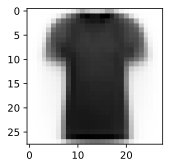

In [4]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

No segundo caso, vemos novamente que a média se assemelha a uma imagem borrada de calças.


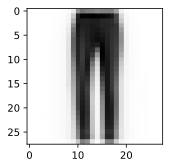

In [5]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

Em uma solução totalmente aprendida pela máquina, aprenderíamos o limite do conjunto de dados. Nesse caso, simplesmente analisamos um limite que parecia bom nos dados de treinamento à mão.


In [6]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

# Accuracy
torch.mean(predictions.type(y_test.dtype) == y_test, dtype=torch.float64)

tensor(0.7870, dtype=torch.float64)

## Geometria de Transformações Lineares


Por meio de :numref:`sec_linear-algebra` e das discussões acima,
temos um conhecimento sólido da geometria de vetores, comprimentos e ângulos.
No entanto, há um objeto importante que omitimos de discutir,
e essa é uma compreensão geométrica das transformações lineares representadas por matrizes. Totalmente internalizando o que as matrizes podem fazer para transformar dados
entre dois espaços de dimensões elevadas potencialmente diferentes requer prática significativa,
e está além do escopo deste apêndice.
No entanto, podemos começar a construir a intuição em duas dimensões.

Suponha que temos alguma matriz:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\ c & d
\end{bmatrix}.
$$

Se quisermos aplicar isso a um vetor arbitrário
$\mathbf{v} = [x, y]^\top$,
nós nos multiplicamos e vemos que

$$
\begin{aligned}
\mathbf{A}\mathbf{v} & = \begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \\
& = \begin{bmatrix}ax+by\\ cx+dy\end{bmatrix} \\
& = x\begin{bmatrix}a \\ c\end{bmatrix} + y\begin{bmatrix}b \\d\end{bmatrix} \\
& = x\left\{\mathbf{A}\begin{bmatrix}1\\0\end{bmatrix}\right\} + y\left\{\mathbf{A}\begin{bmatrix}0\\1\end{bmatrix}\right\}.
\end{aligned}
$$


Isso pode parecer um cálculo estranho,
onde algo claro se tornou algo impenetrável.
No entanto, isso nos diz que podemos escrever da maneira
que uma matriz transforma *qualquer* vetor
em termos de como ele transforma *dois vetores específicos*:
$[1,0]^\top$ and $[0,1]^\top$.
Vale a pena considerar isso por um momento.
Nós essencialmente reduzimos um problema infinito
(o que acontece com qualquer par de números reais)
para um finito (o que acontece com esses vetores específicos).
Esses vetores são um exemplo de *vetores canônicos*,
onde podemos escrever qualquer vetor em nosso espaço
como uma soma ponderada desses *vetores canônicos*.

Vamos desenhar o que acontece quando usamos a matriz específica

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix}.
$$


Se olharmos para o vetor específico $\mathbf{v} = [2, -1]^\top$,
vemos que é $2\cdot[1,0]^\top + -1\cdot[0,1]^\top$,
e assim sabemos que a matriz $A$ irá enviar isso para
$2(\mathbf{A}[1,0]^\top) + -1(\mathbf{A}[0,1])^\top = 2[1, -1]^\top - [2,3]^\top = [0, -5]^\top$.
Se seguirmos essa lógica com cuidado,
digamos, considerando a grade de todos os pares inteiros de pontos,
vemos que o que acontece é que a multiplicação da matriz
pode inclinar, girar e dimensionar a grade,
mas a estrutura da grade deve permanecer como você vê em :numref:`fig_grid-transform`.

![A matriz $\mathbf{A}$ agindo nos vetores de base dados. Observe como toda a grade é transportada junto com ela.](../img/grid-transform.svg)
:label:`fig_grid-transform`

Este é o ponto intuitivo mais importante
para internalizar sobre transformações lineares representadas por matrizes.
As matrizes são incapazes de distorcer algumas partes do espaço de maneira diferente de outras.
Tudo o que elas podem fazer é pegar as coordenadas originais em nosso espaço
e inclinar, girar e dimensioná-las.

Algumas distorções podem ser graves. Por exemplo, a matriz

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix},
$$

comprime todo o plano bidimensional em uma única linha.
Identificar e trabalhar com essas transformações é o tópico de uma seção posterior,
mas geometricamente podemos ver que isso é fundamentalmente diferente
dos tipos de transformações que vimos acima.
Por exemplo, o resultado da matriz $\mathbf{A}$ pode ser "dobrado" para a grade original. Os resultados da matriz $\mathbf{B}$ não podem
porque nunca saberemos de onde o vetor $[1,2]^\top$ veio --- estava
it $[1,1]^\top$ ou $[0, -1]^\top$?

Embora esta imagem fosse para uma matriz $2\times2$,
nada nos impede de levar as lições aprendidas para dimensões superiores.
Se tomarmos vetores de base semelhantes como $[1,0, \ldots,0]$
e ver para onde nossa matriz os envia,
podemos começar a ter uma ideia de como a multiplicação da matriz
distorce todo o espaço em qualquer dimensão de espaço com a qual estamos lidando.

## Dependência Linear

Considere novamente a matriz

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix}.
$$

Isso comprime todo o plano para viver na única linha $y=2x$.
A questão agora surge: há alguma maneira de detectarmos isso
apenas olhando para a própria matriz?
A resposta é que realmente podemos.
Tomemos $\mathbf{b}_1 = [2,4]^\top$ e $\mathbf{b}_2 = [-1, -2]^\top$
sejam as duas colunas de $\mathbf{B}$.
Lembre-se de que podemos escrever tudo transformado pela matriz $\mathbf{B}$
como uma soma ponderada das colunas da matriz:
como $a_1\mathbf{b}_1 + a_2\mathbf{b}_2$.
Chamamos isso de *combinação linear*.
O fato de $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$
significa que podemos escrever qualquer combinação linear dessas duas colunas
inteiramente em termos de, digamos, $\mathbf{b}_2$ desde

$$
a_1\mathbf{b}_1 + a_2\mathbf{b}_2 = -2a_1\mathbf{b}_2 + a_2\mathbf{b}_2 = (a_2-2a_1)\mathbf{b}_2.
$$

Isso significa que uma das colunas é, de certo modo, redundante
porque não define uma direção única no espaço.
Isso não deve nos surpreender muito
pois já vimos que esta matriz
reduz o plano inteiro em uma única linha.
Além disso, vemos que a dependência linear
$\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ captura isso.
Para tornar isso mais simétrico entre os dois vetores, vamos escrever isso como

$$
\mathbf{b}_1  + 2\cdot\mathbf{b}_2 = 0.
$$

Em geral, diremos que uma coleção de vetores
$\mathbf{v}_1, \ldots, \mathbf{v}_k$ são *linearmente dependentes*
se existirem coeficientes $a_1, \ldots, a_k$ *nem todos iguais a zero* de modo que

$$
\sum_{i=1}^k a_i\mathbf{v_i} = 0.
$$

Neste caso, podemos resolver para um dos vetores
em termos de alguma combinação dos outros,
e efetivamente torná-lo redundante.
Assim, uma dependência linear nas colunas de uma matriz
é uma testemunha do fato de que nossa matriz
está comprimindo o espaço para alguma dimensão inferior.
Se não houver dependência linear, dizemos que os vetores são *linearmente independentes*.
Se as colunas de uma matriz são linearmente independentes,
nenhuma compressão ocorre e a operação pode ser desfeita.

## Classificação

Se tivermos uma matriz geral $n\times m$,
é razoável perguntar em qual espaço de dimensão a matriz mapeia.
Um conceito conhecido como classificação será a nossa resposta.
Na seção anterior, notamos que uma dependência linear
testemunha a compressão do espaço em uma dimensão inferior
e assim seremos capazes de usar isso para definir a noção de posto.
Em particular, a classificação de uma matriz $\mathbf{A}$
é o maior número de colunas linearmente independentes
entre todos os subconjuntos de colunas. Por exemplo, a matriz

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix},
$$

tem $\mathrm{rank}(B)=1$, uma vez que as duas colunas são linearmente dependentes,
mas qualquer coluna por si só não é linearmente dependente.
Para um exemplo mais desafiador, podemos considerar

$$
\mathbf{C} = \begin{bmatrix}
1& 3 & 0 & -1 & 0 \\
-1 & 0 & 1 & 1 & -1 \\
0 & 3 & 1 & 0 & -1 \\
2 & 3 & -1 & -2 & 1
\end{bmatrix},
$$


e mostrar que $\mathbf{C}$ tem classificação dois, uma vez que, por exemplo,
as duas primeiras colunas são linearmente independentes,
entretanto, qualquer uma das quatro coleções de três colunas é dependente.

Este procedimento, conforme descrito, é muito ineficiente.
Requer olhar para cada subconjunto das colunas de nossa matriz,
e, portanto, é potencialmente exponencial no número de colunas.
Mais tarde, veremos uma forma mais eficiente do ponto de vista computacional
para calcular a classificação de uma matriz, mas por enquanto,
isso é suficiente para ver que o conceito
está bem definido e compreende o significado.

## Invertibilidade

Vimos acima que a multiplicação por uma matriz com colunas linearmente dependentes
não pode ser desfeita, ou seja, não há operação inversa que sempre pode recuperar a entrada. No entanto, a multiplicação por uma matriz de classificação completa
(ou seja, algum $\mathbf{A}$ que é $n \times n$ matriz com classificação $n$),
devemos sempre poder desfazê-lo. Considere a matriz

$$
\mathbf{I} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}.
$$

que é a matriz com uns ao longo da diagonal e zeros em outros lugares.
Chamamos isso de matriz de * identidade *.
É a matriz que deixa nossos dados inalterados quando aplicados.
Para encontrar uma matriz que desfaça o que nossa matriz $\mathbf{A}$ fez,
queremos encontrar uma matriz $\mathbf{A}^{-1}$ tal que

$$
\mathbf{A}^{-1}\mathbf{A} = \mathbf{A}\mathbf{A}^{-1} =  \mathbf{I}.
$$

Se olharmos para isso como um sistema, temos $n \times n$ incógnitas
(as entradas de $\mathbf{A}^{-1}$) e $n \times n$ equações
(a igualdade que precisa ser mantida entre cada entrada do produto $\mathbf{A}^{-1}\mathbf{A}$ e cada entrada de $\mathbf{I}$)
portanto, devemos genericamente esperar que exista uma solução.
Na verdade, na próxima seção, veremos uma quantidade chamada de *determinante*,
que tem a propriedade de que, desde que o determinante não seja zero, podemos encontrar uma solução. Chamamos tal matriz $\mathbf{A}^{-1}$ de matriz *inversa*.
Por exemplo, se $\mathbf{A}$ é a matriz $2 \times 2$ geral

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

então podemos ver que a inversa é

$$
 \frac{1}{ad-bc}  \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}.
$$

Podemos testar para ver isso vendo que a multiplicação
pela inversa dado pela fórmula acima funciona na prática.


In [7]:
M = torch.tensor([[1, 2], [1, 4]], dtype=torch.float32)
M_inv = torch.tensor([[2, -1], [-0.5, 0.5]])
M_inv @ M

tensor([[1., 0.],
        [0., 1.]])

### Problemas Numéricos
Embora o inverso de uma matriz seja útil em teoria,
devemos dizer que na maioria das vezes não desejamos
*usar* a matriz inversa para resolver um problema na prática.
Em geral, existem algoritmos muito mais estáveis numericamente
para resolver equações lineares como

$$
\mathbf{A}\mathbf{x} = \mathbf{b},
$$

do que calcular a inversa e multiplicar para obter

$$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.
$$

Assim como a divisão por um pequeno número pode levar à instabilidade numérica,
o mesmo pode acontecer com a inversão de uma matriz que está perto de ter uma classificação baixa.


Além disso, é comum que a matriz $\mathbf{A}$ seja *esparsa*,
o que significa que ele contém apenas um pequeno número de valores diferentes de zero.
Se fossemos explorar exemplos, veríamos
que isso não significa que o inverso é esparso.
Mesmo se $\mathbf{A}$ fosse uma matriz de $1$ milhão por $1$ milhão
com apenas $5$ milhões de entradas diferentes de zero
(e, portanto, precisamos apenas armazenar aqueles $5$ milhões),
a inversa normalmente terá quase todas as entradas não negativas,
exigindo que armazenemos todas as $1\text{M}^2$ de entradas --- isto é $1$ trilhão de entradas!

Embora não tenhamos tempo para mergulhar totalmente nas espinhosas questões numéricas
frequentemente encontrados ao trabalhar com álgebra linear,
queremos fornecer-lhe alguma intuição sobre quando proceder com cautela,
e geralmente evitar a inversão na prática é uma boa regra prática.

## Determinante
A visão geométrica da álgebra linear oferece uma maneira intuitiva
para interpretar uma quantidade fundamental conhecida como *determinante*.
Considere a imagem da grade de antes, mas agora com uma região destacada (:numref:`fig_grid-fill`).

![A matriz $\mathbf{A}$ novamente distorcendo a grade. Desta vez, quero chamar a atenção em particular para o que acontece com o quadrado destacado.](../img/grid-transform-filled.svg)
:label:`fig_grid-filled`

Olhe para o quadrado destacado. Este é um quadrado com bordas fornecidas
por $(0, 1)$ e $(1, 0)$ e, portanto, tem área um.
Depois que $\mathbf{A}$ transforma este quadrado,
vemos que se torna um paralelogramo.
Não há razão para este paralelogramo ter a mesma área
com que começamos, e de fato no caso específico mostrado aqui de

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix},
$$


é um exercício de geometria coordenada para calcular
a área deste paralelogramo e obtenha que a área é $5$.

Em geral, se tivermos uma matriz

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$


podemos ver com alguns cálculos que a área
do paralelogramo resultante é $ad-bc$.
Essa área é chamada de *determinante*.

Vamos verificar isso rapidamente com algum código de exemplo.


In [8]:
torch.det(torch.tensor([[1, -1], [2, 3]], dtype=torch.float32))

tensor(5.)

Os olhos de águia entre nós notarão
que esta expressão pode ser zero ou mesmo negativa.
Para o termo negativo, isso é uma questão de convenção
geralmente considerado em matemática:
se a matriz inverte a figura,
dizemos que a área está negada.
Vejamos agora que quando o determinante é zero, aprendemos mais.

Vamos considerar

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix}.
$$


Se calcularmos o determinante desta matriz,
obtemos $2\cdot(-2 ) - 4\cdot(-1) = 0$.
Dado o nosso entendimento acima, isso faz sentido.
$\mathbf{B}$ comprime o quadrado da imagem original
até um segmento de linha, que tem área zero.
E, de fato, sendo comprimido em um espaço dimensional inferior
é a única maneira de ter área zero após a transformação.
Assim, vemos que o seguinte resultado é verdadeiro:
uma matriz $A$ é invertível se e somente se
o determinante não é igual a zero.

Como comentário final, imagine que temos alguma figura desenhada no avião.
Pensando como cientistas da computação, podemos decompor
aquela figura em uma coleção de pequenos quadrados
de modo que a área da figura é em essência
apenas o número de quadrados na decomposição.
Se agora transformarmos essa figura em uma matriz,
enviamos cada um desses quadrados para paralelogramos,
cada um deles tem área dada pelo determinante.
Vemos que para qualquer figura, o determinante dá o número (com sinal)
que uma matriz dimensiona a área de qualquer figura.

Determinantes de computação para matrizes maiores podem ser trabalhosos,
mas a intuição é a mesma.
O determinante continua sendo o fator
que $n\times n$ matrizes escalam volumes $n$-dimensionais.

## Tensores e Operações de Álgebra Linear Comum


Em :numref:`sec_linear-algebra` o conceito de tensores foi introduzido.
Nesta seção, vamos mergulhar mais profundamente nas contrações tensoras
(o tensor equivalente à multiplicação da matriz),
e ver como pode fornecer uma visão unificada
em uma série de operações de matriz e vetor.

Com matrizes e vetores, sabíamos como multiplicá-los para transformar os dados.
Precisamos ter uma definição semelhante para tensores se eles forem úteis para nós.
Pense na multiplicação de matrizes:

$$
\mathbf{C} = \mathbf{A}\mathbf{B},
$$

ou equivalente

$$ c_{i, j} = \sum_{k} a_{i, k}b_{k, j}.$$

Esse padrão pode ser repetido para tensores.
Para tensores, não há um caso de qual
para somar isso pode ser universalmente escolhido,
portanto, precisamos especificar exatamente quais índices queremos somar.
Por exemplo, podemos considerar

$$
y_{il} = \sum_{jk} x_{ijkl}a_{jk}.
$$


Essa transformação é chamada de *contração tensorial*.
Pode representar uma família de transformações muito mais flexível
que a multiplicação de matriz sozinha.

Como uma simplificação de notação frequentemente usada,
podemos notar que a soma está exatamente acima desses índices
que ocorrem mais de uma vez na expressão,
assim, as pessoas costumam trabalhar com *notação de Einstein*,
onde o somatório é implicitamente assumido sobre todos os índices repetidos.
Isso dá a expressão compacta:

$$
y_{il} = x_{ijkl}a_{jk}.
$$

### Exemplos Comuns de Álgebra Linear

Vamos ver quantas das definições algébricas lineares
que vimos antes pode ser expresso nesta notação de tensor compactado:

* $\mathbf{v} \cdot \mathbf{w} = \sum_i v_iw_i$
* $\|\mathbf{v}\|_2^{2} = \sum_i v_iv_i$
* $(\mathbf{A}\mathbf{v})_i = \sum_j a_{ij}v_j$
* $(\mathbf{A}\mathbf{B})_{ik} = \sum_j a_{ij}b_{jk}$
* $\mathrm{tr}(\mathbf{A}) = \sum_i a_{ii}$

Dessa forma, podemos substituir uma miríade de notações especializadas por expressões tensoriais curtas.

### Expressando em Código
Os tensores também podem ser operados com flexibilidade no código.
Conforme visto em :numref:`sec_linear-algebra`,
podemos criar tensores como mostrado abaixo.


In [9]:
# Define tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))

O somatório de Einstein foi implementado diretamente.
Os índices que ocorrem na soma de Einstein podem ser passados como uma *string*,
seguido pelos tensores que estão sofrendo ação.
Por exemplo, para implementar a multiplicação de matrizes,
podemos considerar o somatório de Einstein visto acima
($\mathbf{A}\mathbf{v} = a_{ij}v_j$)
e retirar os próprios índices para obter a implementação:


In [10]:
# Reimplement matrix multiplication
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

Esta é uma notação altamente flexível.
Por exemplo, se quisermos calcular
o que seria tradicionalmente escrito como

$$
c_{kl} = \sum_{ij} \mathbf{b}_{ijk}\mathbf{a}_{il}v_j.
$$

pode ser implementado via somatório de Einstein como:


In [11]:
torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])

Esta notação é legível e eficiente para humanos,
por mais volumoso que seja por algum motivo
precisamos gerar uma contração de tensor programaticamente.
Por este motivo, `einsum` fornece uma notação alternativa
fornecendo índices inteiros para cada tensor.
Por exemplo, a mesma contração tensorial também pode ser escrita como:


In [12]:
# PyTorch doesn't support this type of notation.

Qualquer uma das notações permite uma representação concisa e eficiente das contrações do tensor no código.

## Resumo
* Os vetores podem ser interpretados geometricamente como pontos ou direções no espaço.
* Os produtos escalares definem a noção de ângulo para espaços de dimensões arbitrariamente altas.
* Hiperplanos são generalizações dimensionais de linhas e planos. Eles podem ser usados ​​para definir planos de decisão que geralmente são usados ​​como a última etapa em uma tarefa de classificação.
* A multiplicação de matrizes pode ser interpretada geometricamente como distorções uniformes das coordenadas subjacentes. Eles representam uma maneira muito restrita, mas matematicamente limpa, de transformar vetores.
* Dependência linear é uma forma de saber quando uma coleção de vetores está em um espaço dimensional inferior do que esperaríamos (digamos que você tenha $3$ vetores vivendo em um espaço $2$-dimensional). A classificação de uma matriz é o tamanho do maior subconjunto de suas colunas que são linearmente independentes.
* Quando a inversa de uma matriz é definida, a inversão da matriz nos permite encontrar outra matriz que desfaça a ação da primeira. A inversão da matriz é útil na teoria, mas requer cuidado na prática devido à instabilidade numérica.
* Os determinantes nos permitem medir o quanto uma matriz se expande ou contrai em um espaço. Um determinante diferente de zero implica uma matriz invertível (não singular) e um determinante de valor zero significa que a matriz é não invertível (singular).
* As contrações do tensor e a soma de Einstein fornecem uma notação limpa e organizada para expressar muitos dos cálculos que são vistos no aprendizado de máquina.

## Exercícios
1. Qual é o ângulo entre
$$
\vec v_1 = \begin{bmatrix}
1 \\ 0 \\ -1 \\ 2
\end{bmatrix}, \qquad \vec v_2 = \begin{bmatrix}
3 \\ 1 \\ 0 \\ 1
\end{bmatrix}?
$$
2. Verdadeiro ou falso: $\begin{bmatrix}1 & 2\\0&1\end{bmatrix}$ e $\begin{bmatrix}1 & -2\\0&1\end{bmatrix}$ são inversas uma da outra?
3. Suponha que desenhemos uma forma no plano com área $100\mathrm{m}^2$. Qual é a área depois de transformar a figura pela matriz
$$
\begin{bmatrix}
2 & 3\\
1 & 2
\end{bmatrix}.
$$
4. Qual dos seguintes conjuntos de vetores são linearmente independentes?
 * $\left\{\begin{pmatrix}1\\0\\-1\end{pmatrix}, \begin{pmatrix}2\\1\\-1\end{pmatrix}, \begin{pmatrix}3\\1\\1\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}3\\1\\1\end{pmatrix}, \begin{pmatrix}1\\1\\1\end{pmatrix}, \begin{pmatrix}0\\0\\0\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}1\\1\\0\end{pmatrix}, \begin{pmatrix}0\\1\\-1\end{pmatrix}, \begin{pmatrix}1\\0\\1\end{pmatrix}\right\}$
5. Suponha que você tenha uma matriz escrita como $A = \begin{bmatrix}c\\d\end{bmatrix}\cdot\begin{bmatrix}a & b\end{bmatrix}$ para alguma escolha de valores $a, b, c$,e $d$.  Verdadeiro ou falso: o determinante dessa matriz é sempre $0$?
6. Os vetores $e_1 = \begin{bmatrix}1\\0\end{bmatrix}$ e $e_2 = \begin{bmatrix}0\\1\end{bmatrix}$ são ortogonais. Qual é a condição em uma matriz $A$ para que $Ae_1$ e $Ae_2$ sejam ortogonais?
7. Como você pode escrever $\mathrm{tr}(\mathbf{A}^4)$ na notação de Einstein para uma matriz arbitrária $A$?


[Discussões](https://discuss.d2l.ai/t/1084)


<!--stackedit_data:
eyJoaXN0b3J5IjpbMTAxMzE4MDU4NywxMTg3NDAzMDQsLTE3OD
U3ODgwMzAsLTEwNzY5MTgyNjksNDgyOTc3MjU1LDQyNDEwMDM2
MSwxNTk5OTgwNDIwLC03ODc2ODM1ODQsMTIyOTA4NDY4NiwxOT
kxODk4NTM4LC0xNjQzNjc4Nzk0LC03NTk4ODE3MDYsMjIyMjc4
MTIyLC0zNDg2ODI3MzEsLTkyMzYxMjc1NywxMTk1NzY0MTgxLC
0yMTA3MzY0Mzc2LDIxMDI4NzE3ODUsLTczMzAxNjM1OCwtMTU4
OTIxMzA2NF19
-->
